In [1]:
import torch

import torch.nn as nn

In [2]:
from transformers import AutoModel

model = AutoModel.from_pretrained("deepsynthbody/deepfake_ecg", trust_remote_code=True)

out = model(num_samples=5)

config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

configurations_deepfake.py:   0%|          | 0.00/641 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepsynthbody/deepfake_ecg:
- configurations_deepfake.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_deepfake.py:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepsynthbody/deepfake_ecg:
- modeling_deepfake.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/42.4M [00:00<?, ?B/s]

AttributeError: 'list' object has no attribute 'shape'

In [13]:
model

DeepFakeECGFromPulse2Pulse(
  (model): Pulse2pulseGenerator(
    (fc1): Linear(in_features=100, out_features=500, bias=True)
    (deconv_1): Transpose1dLayer(
      (upsample_layer): Upsample(scale_factor=5.0, mode='nearest')
      (reflection_pad): ConstantPad1d(padding=(12, 12), value=0)
      (conv1d): Conv1d(250, 250, kernel_size=(25,), stride=(1,))
      (Conv1dTrans): ConvTranspose1d(250, 250, kernel_size=(25,), stride=(1,), padding=(11,), output_padding=(1,))
    )
    (deconv_2): Transpose1dLayer_multi_input(
      (upsample_layer): Upsample(scale_factor=5.0, mode='nearest')
      (reflection_pad): ConstantPad1d(padding=(12, 12), value=0)
      (conv1d): Conv1d(500, 150, kernel_size=(25,), stride=(1,))
      (Conv1dTrans): ConvTranspose1d(500, 150, kernel_size=(25,), stride=(1,), padding=(11,), output_padding=(1,))
    )
    (deconv_3): Transpose1dLayer_multi_input(
      (upsample_layer): Upsample(scale_factor=5.0, mode='nearest')
      (reflection_pad): ConstantPad1d(padding=

In [6]:
out[0].shape

torch.Size([5000, 8])

In [7]:
out[1].shape

torch.Size([5000, 8])

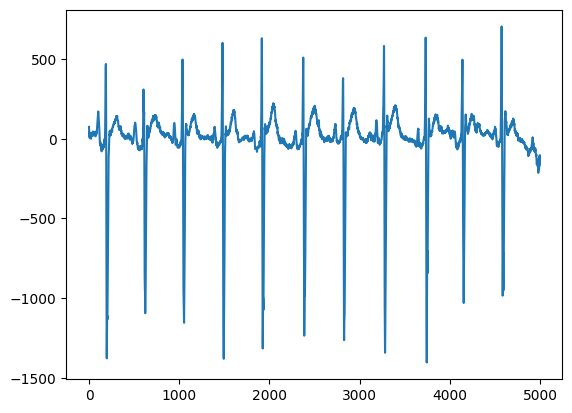

In [12]:
from matplotlib import pyplot as plt

plt.plot(out[0][:, 3])

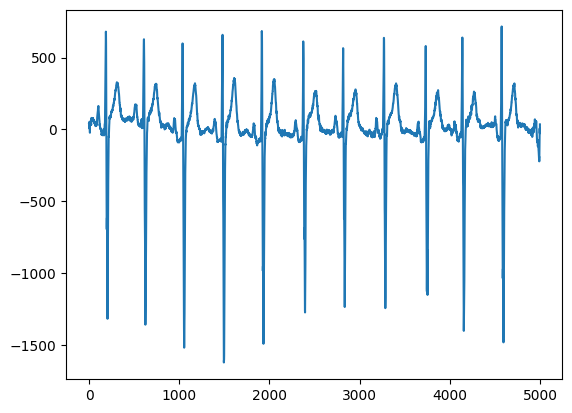

In [15]:
plt.plot(out[0][:, 4])

In [8]:
# artificial data
import sklearn
from sklearn import datasets
import pandas as pd

# from sklearn we are going to select one dataset
data=datasets.make_regression()
df = pd.DataFrame(data[0], columns=[f"feature_{i+1}" for i in range(data[0].shape[1])])
df["target"] = data[1]
df.shape

(100, 101)

In [39]:
# Layers
c0 = nn.Conv1d(1, 128, 1)
maxpool = nn.MaxPool1d(2)
avgpool = nn.AvgPool1d(2)

# Input
x = torch.rand(100, 20, 1)
x = x.transpose(1, 2)
print(x.shape)

# Conv
x = c0(x)
print(x.shape)

x = avgpool(x)
x.shape

x = maxpool(x)
x.shape



torch.Size([100, 1, 20])
torch.Size([100, 128, 20])
